In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

# Bike sharing

In [2]:
bike_df = pd.read_csv('../datasets/bike-sharing.csv')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


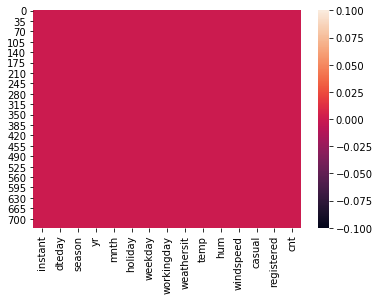

In [3]:
sea.heatmap(bike_df.isnull());

In [4]:
bike_df.drop(columns=['instant', 'casual', 'registered'], inplace=True)
bike_df.dteday = pd.to_datetime(bike_df.dteday, format = '%m/%d/%Y')
bike_df.index = pd.DatetimeIndex(bike_df.dteday)
bike_df.drop(columns='dteday', inplace=True)

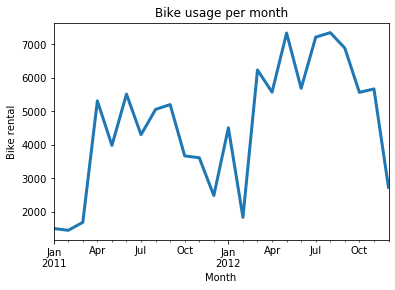

In [5]:
bike_df['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike usage per month')
plt.xlabel('Month')
plt.ylabel('Bike rental');

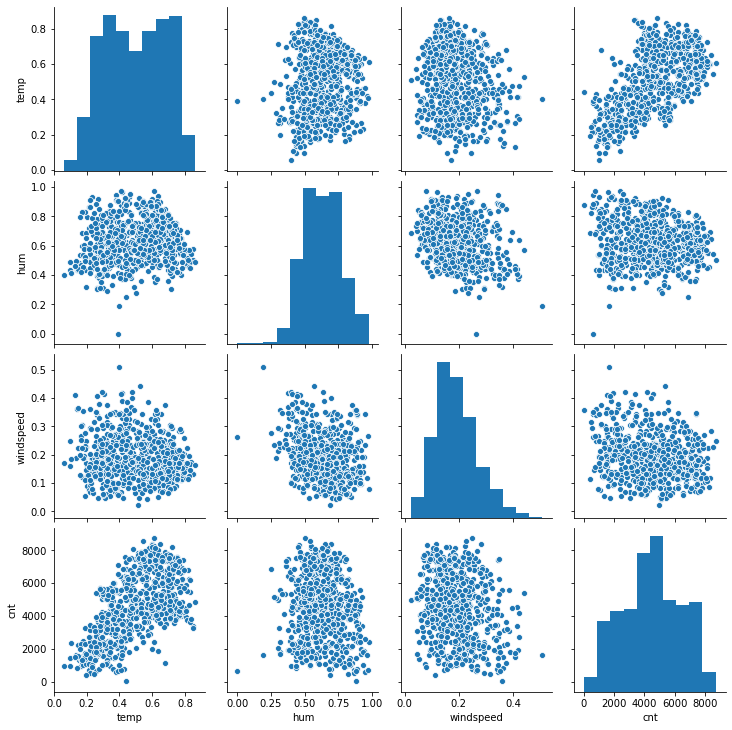

In [6]:
x_numerical = bike_df[['temp','hum','windspeed', 'cnt']]
sea.pairplot(x_numerical);

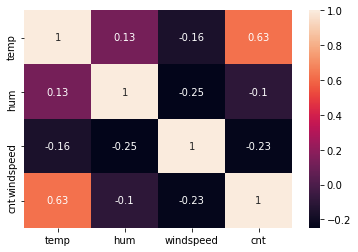

In [7]:
sea.heatmap(x_numerical.corr(), annot = True);

In [8]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
x_cat = onehot.fit_transform(bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]).toarray()
x_cat = pd.DataFrame(x_cat)

In [9]:
x_numerical.reset_index(inplace = True)
x_all = pd.concat([x_cat, x_numerical], axis = 1)
x_all.drop(columns='dteday', inplace=True)

In [10]:
x = x_all.iloc[:, :-1].values
y = x_all.iloc[:, -1:].values

print(x.shape, y.shape)

(731, 35) (731, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (35,)))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [15]:
epochs_hist = model.fit(x_train, y_train, epochs = 25, batch_size = 50, validation_split = 0.2)

Train on 467 samples, validate on 117 samples
Epoch 1/25
467/467 [==============================] - 0s 887us/sample - loss: 0.0950 - val_loss: 0.0227
Epoch 2/25
467/467 [==============================] - 0s 52us/sample - loss: 0.0270 - val_loss: 0.0157
Epoch 3/25
467/467 [==============================] - 0s 78us/sample - loss: 0.0159 - val_loss: 0.0098
Epoch 4/25
467/467 [==============================] - 0s 92us/sample - loss: 0.0119 - val_loss: 0.0082
Epoch 5/25
467/467 [==============================] - 0s 107us/sample - loss: 0.0091 - val_loss: 0.0071
Epoch 6/25
467/467 [==============================] - 0s 89us/sample - loss: 0.0078 - val_loss: 0.0067
Epoch 7/25
467/467 [==============================] - 0s 91us/sample - loss: 0.0070 - val_loss: 0.0064
Epoch 8/25
467/467 [==============================] - 0s 90us/sample - loss: 0.0064 - val_loss: 0.0065
Epoch 9/25
467/467 [==============================] - 0s 77us/sample - loss: 0.0059 - val_loss: 0.0062
Epoch 10/25
467/467 [====

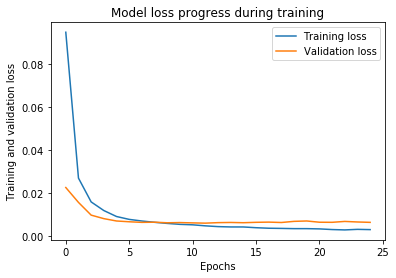

In [16]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

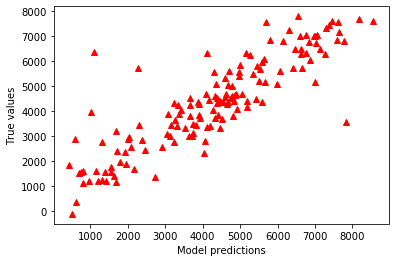

In [17]:
y_predict = scaler.inverse_transform(model.predict(x_test))
y_test = scaler.inverse_transform(y_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values');

In [18]:
k = x_test.shape[1]
n = len(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print('MAE: ',mae, '\nMSE: ',mse, '\nRMSE: ', rmse, '\nR2', r2, '\nADJ R2: ', adj_r2)

MAE:  655.0879569540218 
MSE:  968025.4491689404 
RMSE:  983.8828432130222 
R2 0.7556180234660381 
ADJ R2:  0.6785606434778519


# House data 

In [19]:
house_df = pd.read_csv('../datasets/house-data.csv')
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


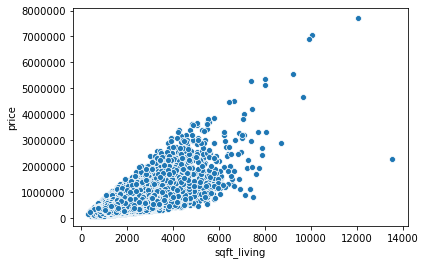

In [20]:
sea.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

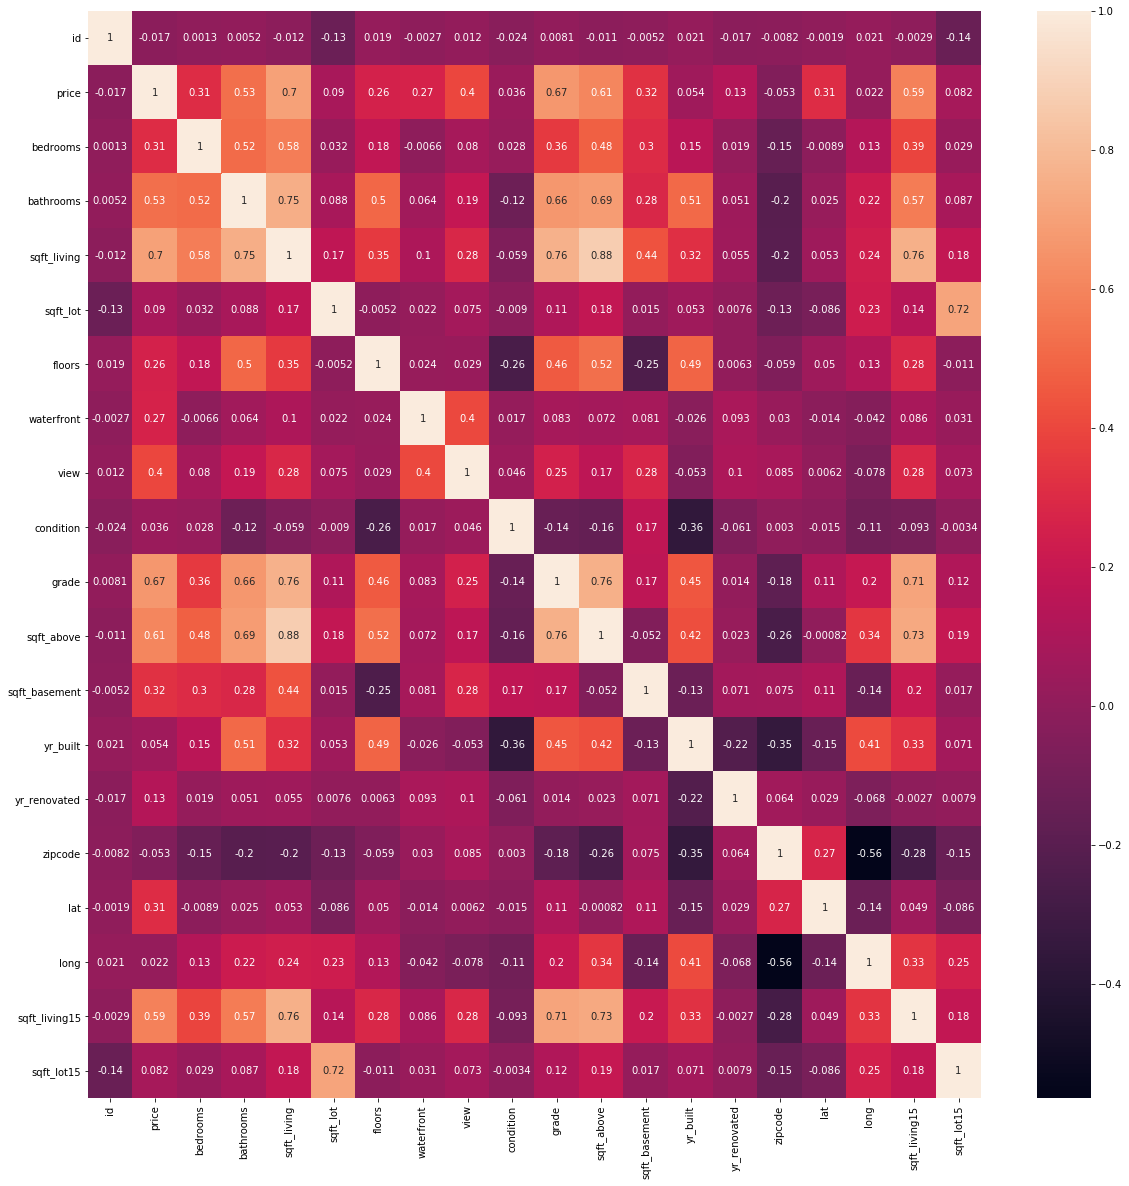

In [21]:
f, ax = plt.subplots(figsize = (20,20))
sea.heatmap(house_df.corr(), annot= True);

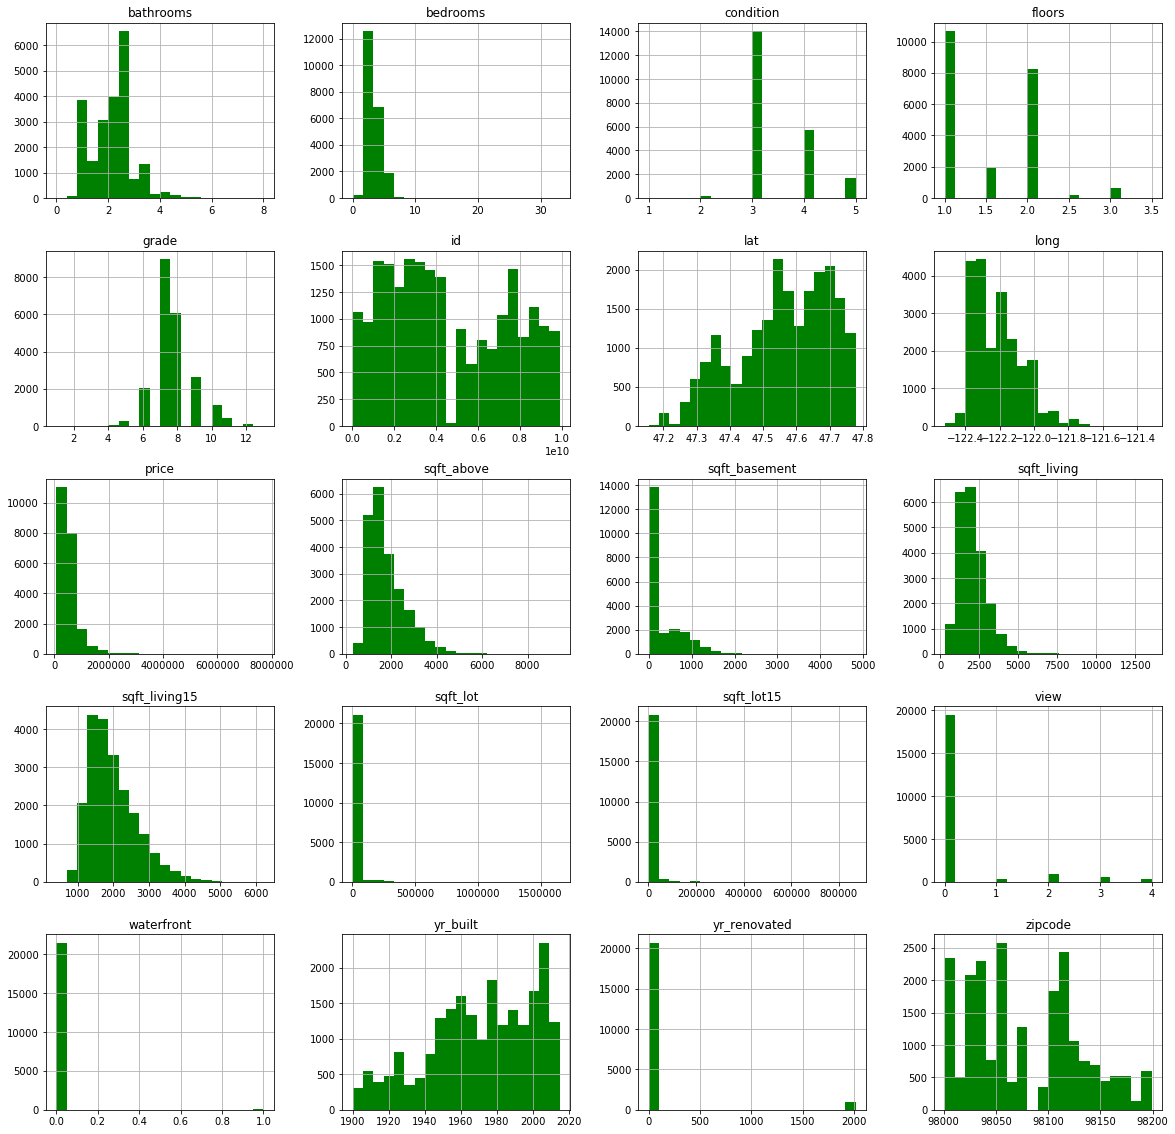

In [22]:
house_df.hist(bins = 20, figsize = (20,20), color = 'g');

In [23]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'waterfront', 'condition', 'grade',
                     'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
x = house_df[selected_features]
y = house_df['price'].values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
print(x.shape, y.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

(21613, 18) (21613, 1)


In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (18, )))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               1900      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 22,201
Trainable params: 22,201
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='Adam', loss='mean_squared_error')
hist = model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 70us/sample - loss: 8.6738e-04 - val_loss: 4.7895e-04
Epoch 2/100
12967/12967 [==============================] - 1s 47us/sample - loss: 4.9098e-04 - val_loss: 4.8302e-04
Epoch 3/100
12967/12967 [==============================] - 1s 52us/sample - loss: 4.3707e-04 - val_loss: 4.0118e-04
Epoch 4/100
12967/12967 [==============================] - 1s 52us/sample - loss: 3.7833e-04 - val_loss: 3.7922e-04
Epoch 5/100
12967/12967 [==============================] - 1s 50us/sample - loss: 3.4893e-04 - val_loss: 3.5160e-04
Epoch 6/100
12967/12967 [==============================] - 1s 53us/sample - loss: 3.3164e-04 - val_loss: 3.3294e-04
Epoch 7/100
12967/12967 [==============================] - 1s 53us/sample - loss: 3.3571e-04 - val_loss: 3.5811e-04
Epoch 8/100
12967/12967 [==============================] - 1s 55us/sample - loss: 3.1936e-04 - val_loss: 3.6831e-04
Epoch 9/100
12967/12967

12967/12967 [==============================] - 1s 43us/sample - loss: 1.7762e-04 - val_loss: 3.4011e-04
Epoch 71/100
12967/12967 [==============================] - 1s 45us/sample - loss: 2.0314e-04 - val_loss: 2.9728e-04
Epoch 72/100
12967/12967 [==============================] - 1s 46us/sample - loss: 1.7390e-04 - val_loss: 3.0015e-04
Epoch 73/100
12967/12967 [==============================] - 1s 49us/sample - loss: 1.6544e-04 - val_loss: 2.8854e-04
Epoch 74/100
12967/12967 [==============================] - 1s 48us/sample - loss: 1.7857e-04 - val_loss: 3.1230e-04
Epoch 75/100
12967/12967 [==============================] - 1s 53us/sample - loss: 1.7668e-04 - val_loss: 2.6547e-04
Epoch 76/100
12967/12967 [==============================] - 1s 55us/sample - loss: 1.7145e-04 - val_loss: 3.6448e-04
Epoch 77/100
12967/12967 [==============================] - 1s 55us/sample - loss: 1.5919e-04 - val_loss: 3.0924e-04
Epoch 78/100
12967/12967 [==============================] - 1s 52us/sample - 

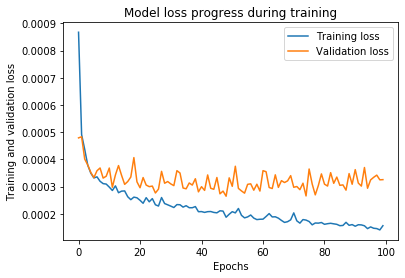

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

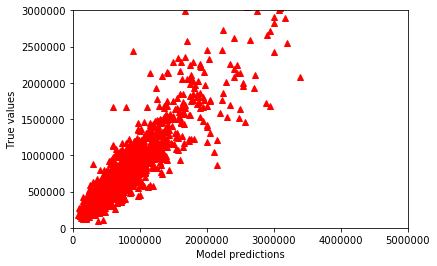

In [29]:
y_predict = scaler.inverse_transform(model.predict(x_test))
y_test = scaler.inverse_transform(y_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [30]:
k = x_test.shape[1]
n = len(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print('MAE: ',mae, '\nMSE: ',mse, '\nRMSE: ', rmse, '\nR2', r2, '\nADJ R2: ', adj_r2)

MAE:  75403.49125069393 
MSE:  18958638335.653862 
RMSE:  137690.3712525094 
R2 0.8744322752957072 
ADJ R2:  0.8740125503106232
